In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Import data

In [43]:
# cell scale data:
cell_scale = pd.read_csv('./apr8/cell-scale/cell_scale_all.csv')

# all cell scale data is inverted, so fix it:
cell_scale['Force (N) E1'] = -cell_scale['Force (N) E1']
cell_scale['Force (N) E2'] = -cell_scale['Force (N) E2']
cell_scale['Force (N) E3'] = -cell_scale['Force (N) E3']
cell_scale['Force (N) O1'] = -cell_scale['Force (N) O1']
cell_scale['Force (N) O2'] = -cell_scale['Force (N) O2']
cell_scale['Force (N) O3'] = -cell_scale['Force (N) O3']
cell_scale['Force (N) O4'] = -cell_scale['Force (N) O4']

# air pressure:
air_pressure_0 = pd.read_csv('./apr8/air-pressure/test_data_0.csv')
air_pressure_1 = pd.read_csv('./apr8/air-pressure/test_data_1.csv')
air_pressure_2 = pd.read_csv('./apr8/air-pressure/test_data_2.csv')
air_pressure_3 = pd.read_csv('./apr8/air-pressure/test_data_3.csv') # EXCLUDE because of leak
air_pressure_4 = pd.read_csv('./apr8/air-pressure/test_data_4.csv')
air_pressure_5 = pd.read_csv('./apr8/air-pressure/test_data_5.csv')
air_pressure_6 = pd.read_csv('./apr8/air-pressure/test_data_6.csv')
air_pressure_7 = pd.read_csv('./apr8/air-pressure/test_data_7.csv')

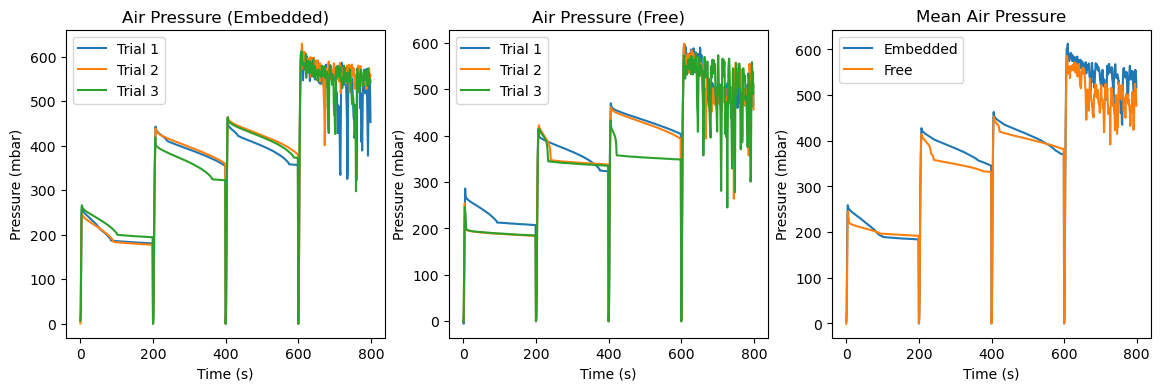

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.plot(air_pressure_0['Pressure (mbar)'], label='Trial 1')  
ax1.plot(air_pressure_1['Pressure (mbar)'], label='Trial 2')
ax1.plot(air_pressure_2['Pressure (mbar)'], label='Trial 3')
ax1.set(xlabel='Time (s)', ylabel='Pressure (mbar)', title='Air Pressure (Embedded)')
ax1.legend()

ax2.plot(air_pressure_4['Pressure (mbar)'], label='Trial 1')
ax2.plot(air_pressure_5['Pressure (mbar)'], label='Trial 2')
# ax2.plot(air_pressure_6['Pressure (mbar)'], label='Pressure (mbar)', alpha=0.5)
ax2.plot(air_pressure_7['Pressure (mbar)'], label='Trial 3')
ax2.set(xlabel='Time (s)', ylabel='Pressure (mbar)', title='Air Pressure (Free)')
ax2.legend()

ax3.plot(np.mean([air_pressure_0['Pressure (mbar)'], air_pressure_1['Pressure (mbar)'], air_pressure_2['Pressure (mbar)']], axis=0), label='Embedded')
ax3.plot(np.mean([air_pressure_4['Pressure (mbar)'], air_pressure_5['Pressure (mbar)'], air_pressure_7['Pressure (mbar)']], axis=0), label='Free')
ax3.set(xlabel='Time (s)', ylabel='Pressure (mbar)', title='Mean Air Pressure')
ax3.legend()
plt.show()

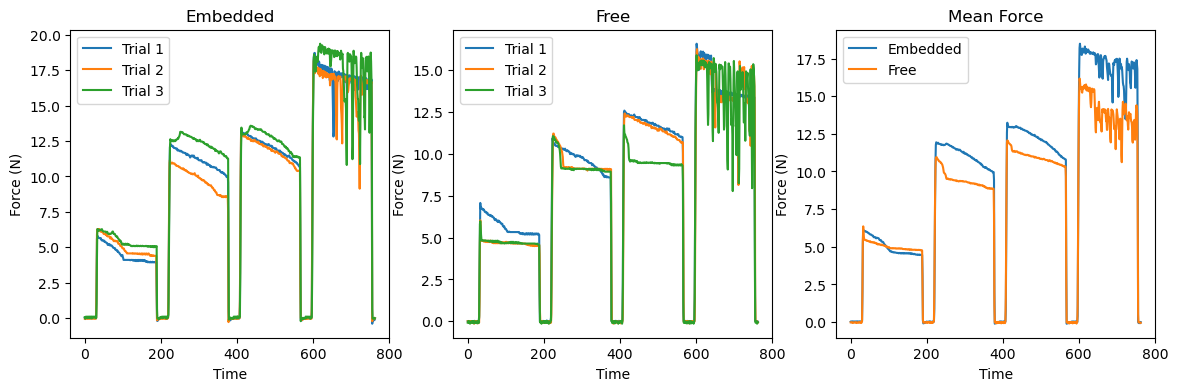

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.plot(cell_scale['Force (N) E1'], label='Trial 1')
ax1.plot(cell_scale['Force (N) E2'], label='Trial 2')
ax1.plot(cell_scale['Force (N) E3'], label='Trial 3')
ax1.set(title='Embedded', xlabel='Time', ylabel='Force (N)')
ax1.legend()

ax2.plot(cell_scale['Force (N) O1'], label='Trial 1')
ax2.plot(cell_scale['Force (N) O2'], label='Trial 2')
# ax2.plot(cell_scale['Force (N) O3'], label='Trial 3')
ax2.plot(cell_scale['Force (N) O4'], label='Trial 3')
ax2.set(title='Free', xlabel='Time', ylabel='Force (N)')
ax2.legend()
mean_embedded = np.mean([cell_scale['Force (N) E1'], cell_scale['Force (N) E2'], cell_scale['Force (N) E3']], axis=0)
mean_free = np.mean([cell_scale['Force (N) O1'], cell_scale['Force (N) O2'], cell_scale['Force (N) O4']], axis=0)

ax3.plot(mean_embedded, label='Embedded')
ax3.plot(mean_free, label='Free')
ax3.set(title='Mean Force', xlabel='Time', ylabel='Force (N)')
ax3.legend()
plt.show()

In [59]:
diff = np.subtract(mean_embedded, mean_free)
print(np.mean(diff))

1.2116657940663176
